## <span style='background :#3FBFBF' >*******************  IMPORTS *******************</span>  

In [2]:
# Import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')
df_td = pd.DataFrame()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


## <span style='background :#3FBFBF' >*******************  DATA SETUP *******************</span>  

In [3]:

pd.options.display.max_columns = 999      # Allos us to display all columns
pd.options.display.max_rows = 999         # Allos us to display all columns

df = df.reindex(sorted(df.columns),axis=1)            # puts cols in alpabetic order
df_test = df_test.reindex(sorted(df.columns),axis=1)  # puts cols in alpabetic order
df.columns = df.columns.str.lower()                   # column names to lower case
df_test.columns = df_test.columns.str.lower()         # column names to lower case

In [3]:
df_test.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,Fa,1020,0,0,Unf,Unf,N,Norm,Norm,FuseP,112,Fa,TA,AsbShng,AsbShng,NaN,NaN,0,Stone,2,Typ,440,1,Po,Unf,Po,Detchd,1910.0,1928,0,GasA,Gd,2Story,2658,2,Fa,Lvl,Gtl,9142,Inside,69.0,Reg,0,190,RM,0.0,None,NaN,0,4,OldTown,60,8,6,902301120,Y,0,NaN,CompShg,Gable,WD,NaN,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,Gd,1967,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,NaN,0,CBlock,2,Typ,580,2,TA,Fin,TA,Attchd,1977.0,1967,0,GasA,TA,1Story,2718,2,TA,Lvl,Gtl,9662,Inside,NaN,IR1,0,90,RL,0.0,None,NaN,0,8,Sawyer,0,4,5,905108090,Y,0,NaN,CompShg,Gable,WD,NaN,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,Gd,100,554,0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,426,2,TA,RFn,TA,Attchd,2006.0,1496,1,GasA,Ex,2Story,2414,1,Gd,Lvl,Gtl,17104,Inside,58.0,IR1,0,60,RL,0.0,None,NaN,0,9,Gilbert,24,5,7,528218130,Y,0,NaN,CompShg,Gable,New,NaN,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,TA,968,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,184,TA,Gd,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,480,2,TA,Unf,Fa,Detchd,1935.0,968,0,GasA,TA,1Story,1989,1,TA,Lvl,Gtl,8520,Inside,60.0,Reg,0,30,RM,0.0,None,NaN,0,7,OldTown,0,6,5,902207150,N,0,NaN,CompShg,Gable,WD,NaN,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,Gd,785,609,0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,1,Typ,514,2,TA,RFn,TA,Attchd,1963.0,1394,1,GasA,Gd,1Story,625,1,TA,Lvl,Gtl,9500,Inside,NaN,IR1,0,20,RL,247.0,BrkFace,NaN,0,7,NAmes,76,5,6,535105100,Y,0,NaN,CompShg,Gable,WD,NaN,185,Pave,6,1394,AllPub,0,1963,1963,2009


In [4]:
df.shape,    # 81 columns (features)   2051 rows

(2051, 81)

In [5]:
df_test.shape # 81 columns (features)   878 rows

(878, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1st flr sf       2051 non-null   int64  
 1   2nd flr sf       2051 non-null   int64  
 2   3ssn porch       2051 non-null   int64  
 3   alley            140 non-null    object 
 4   bedroom abvgr    2051 non-null   int64  
 5   bldg type        2051 non-null   object 
 6   bsmt cond        1996 non-null   object 
 7   bsmt exposure    1993 non-null   object 
 8   bsmt full bath   2049 non-null   float64
 9   bsmt half bath   2049 non-null   float64
 10  bsmt qual        1996 non-null   object 
 11  bsmt unf sf      2050 non-null   float64
 12  bsmtfin sf 1     2050 non-null   float64
 13  bsmtfin sf 2     2050 non-null   float64
 14  bsmtfin type 1   1996 non-null   object 
 15  bsmtfin type 2   1995 non-null   object 
 16  central air      2051 non-null   object 
 17  condition 1   

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1st flr sf       878 non-null    int64  
 1   2nd flr sf       878 non-null    int64  
 2   3ssn porch       878 non-null    int64  
 3   alley            58 non-null     object 
 4   bedroom abvgr    878 non-null    int64  
 5   bldg type        878 non-null    object 
 6   bsmt cond        853 non-null    object 
 7   bsmt exposure    853 non-null    object 
 8   bsmt full bath   878 non-null    int64  
 9   bsmt half bath   878 non-null    int64  
 10  bsmt qual        853 non-null    object 
 11  bsmt unf sf      878 non-null    int64  
 12  bsmtfin sf 1     878 non-null    int64  
 13  bsmtfin sf 2     878 non-null    int64  
 14  bsmtfin type 1   853 non-null    object 
 15  bsmtfin type 2   853 non-null    object 
 16  central air      878 non-null    object 
 17  condition 1     

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe(include=[np.number]).T  # Use .T to transpose and make it easier to read

# with help from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# and https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

# I don't see any negative min numbers
# Looking at the different between Min 25% - 75% and Max for outliers...
# 1st flr sf
# bedroom abvgr
# bsmt full bath
# bsmt unf sf
# bsmtfin sf 1
# bsmtfin sf 2 - what is this?
# fireplaces
# garage area	
# gr liv area
# lot area
# lot frontage
# low qual fin sf - weird?
# mas vnr area - weird?
# open porch sf
# saleprice
# totrms abvgrd
# wood deck sf

,count,mean,std,min,25%,50%,75%,max
1st flr sf,2051.00000,1164.48805,396.44692,334.00000,879.50000,1093.00000,1405.00000,5095.00000
2nd flr sf,2051.00000,329.32911,425.67105,0.00000,0.00000,0.00000,692.50000,1862.00000
3ssn porch,2051.00000,2.59142,25.22961,0.00000,0.00000,0.00000,0.00000,508.00000
bedroom abvgr,2051.00000,2.84349,0.82662,0.00000,2.00000,3.00000,3.00000,8.00000
bsmt full bath,2049.00000,0.42753,0.52267,0.00000,0.00000,0.00000,1.00000,3.00000
bsmt half bath,2049.00000,0.06345,0.25171,0.00000,0.00000,0.00000,0.00000,2.00000
bsmt unf sf,2050.00000,567.72829,444.95479,0.00000,220.00000,474.50000,811.00000,2336.00000
bsmtfin sf 1,2050.00000,442.30049,461.20412,0.00000,0.00000,368.00000,733.75000,5644.00000
bsmtfin sf 2,2050.00000,47.95902,165.00090,0.00000,0.00000,0.00000,0.00000,1474.00000
enclosed porch,2051.00000,22.57192,59.84511,0.00000,0.00000,0.00000,0.00000,432.00000


In [9]:
df_test.describe(include=[np.number]).T 

,count,mean,std,min,25%,50%,75%,max
1st flr sf,878.00000,1145.78702,375.26411,407.00000,864.00000,1063.00000,1358.00000,2674.00000
2nd flr sf,878.00000,348.39863,432.98557,0.00000,0.00000,0.00000,720.00000,2065.00000
3ssn porch,878.00000,2.59795,24.96248,0.00000,0.00000,0.00000,0.00000,360.00000
bedroom abvgr,878.00000,2.87927,0.83071,0.00000,2.00000,3.00000,3.00000,6.00000
bsmt full bath,878.00000,0.43964,0.52995,0.00000,0.00000,0.00000,1.00000,2.00000
bsmt half bath,878.00000,0.05581,0.22968,0.00000,0.00000,0.00000,0.00000,1.00000
bsmt unf sf,878.00000,539.13326,426.17216,0.00000,216.00000,452.00000,780.00000,2046.00000
bsmtfin sf 1,878.00000,441.32802,438.45733,0.00000,0.00000,373.00000,734.75000,2288.00000
bsmtfin sf 2,878.00000,53.89636,178.63236,0.00000,0.00000,0.00000,0.00000,1526.00000
enclosed porch,878.00000,24.06492,73.24946,0.00000,0.00000,0.00000,0.00000,1012.00000


In [10]:
df.describe(include=[object])  #describes all of the object or string features

,alley,bldg type,bsmt cond,bsmt exposure,bsmt qual,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,foundation,functional,garage cond,garage finish,garage qual,garage type,heating,heating qc,house style,kitchen qual,land contour,land slope,lot config,lot shape,ms zoning,mas vnr type,misc feature,neighborhood,paved drive,pool qc,roof matl,roof style,sale type,street,utilities
count,140,2051,1996,1993,1996,1996,1995,2051,2051,2051,2051,2051,2051,2051,2051,400,1051,2051,2051,1937,1937,1937,1938,2051,2051,2051,2051,2051,2051,2051,2051,2051,2029,65,2051,2051,9,2051,2051,2051,2051,2051
unique,2,5,5,4,5,6,6,2,9,8,5,5,4,15,15,4,5,6,8,5,3,5,6,5,5,8,4,4,3,5,4,7,4,5,28,3,4,6,6,9,2,3
top,Grvl,1Fam,TA,No,TA,GLQ,Unf,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,Shed,NAmes,Y,Gd,CompShg,Gable,WD,Pave,AllPub
freq,85,1700,1834,1339,887,615,1749,1910,1767,2025,1868,1778,1247,724,721,227,523,926,1915,1868,849,1832,1213,2018,1065,1059,1047,1843,1953,1503,1295,1598,1218,56,310,1861,4,2025,1619,1781,2044,2049


In [11]:
df_test.describe(include=[object])  

,alley,bldg type,bsmt cond,bsmt exposure,bsmt qual,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,foundation,functional,garage cond,garage finish,garage qual,garage type,heating,heating qc,house style,kitchen qual,land contour,land slope,lot config,lot shape,ms zoning,mas vnr type,misc feature,neighborhood,paved drive,pool qc,roof matl,roof style,sale type,street,utilities
count,58,878,853,853,853,853,853,878,878,878,877,878,878,878,878,172,456,878,878,833,833,833,834,878,878,878,878,878,878,878,878,878,877,41,878,878,4,878,878,878,878,878
unique,2,5,3,4,5,6,6,2,9,3,4,5,4,13,16,4,5,6,6,5,3,4,6,4,4,8,5,4,3,5,4,6,5,3,26,3,2,6,6,10,2,2
top,Grvl,1Fam,TA,No,TA,Unf,Unf,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,Shed,NAmes,Y,Ex,CompShg,Gable,WD,Pave,AllPub
freq,35,724,781,567,396,248,749,823,755,875,813,770,552,302,294,103,220,383,812,796,382,782,518,866,429,422,447,790,835,636,564,674,534,39,133,790,3,861,702,755,873,877



# <font color='red'>**********************************************************************************************</font>
# **************************** <span style='background :yellow' >LET'S FIX ALL OF THE NaN's</span> ****************************
# <font color='red'>**********************************************************************************************</font>

In [12]:
df.isnull().sum()   
# Look at the columns with fewer Nan's first. 
# A lot of the basement features are NaN in similar amounts.  
# The same for garages.

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond            55
bsmt exposure        58
bsmt full bath        2
bsmt half bath        2
bsmt qual            55
bsmt unf sf           1
bsmtfin sf 1          1
bsmtfin sf 2          1
bsmtfin type 1       55
bsmtfin type 2       56
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           1
garage cars           1
garage cond         114
garage finish       114
garage qual         114
garage type         113
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [13]:
df[df['bsmt full bath'].isnull()].head() 


# It looks like 616 is a slab foundation, and 1327 is a poured concrete foundation.  
# Thay may not have basements at all, so the NaN values might need to be 0
# Documentation says that Bsmt Qual should be NA if there is no basement
# same for bsmt cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
616,3820,0,0,NaN,5,1Fam,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,NaN,NaN,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.00000,2.00000,TA,Unf,TA,Attchd,1959.00000,3820,1,GasA,TA,1Story,1498,1,Ex,Lvl,Gtl,47007,Inside,123.00000,IR1,0,20,RL,0.00000,None,NaN,0,7,Edwards,372,7,5,908154080,Y,0,NaN,CompShg,Gable,WD,284700,0,Pave,11,0.00000,AllPub,0,1959,1996,2008
1327,896,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.00000,1.00000,TA,Unf,TA,Detchd,1946.00000,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.00000,IR1,0,20,RM,0.00000,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [14]:
df['bsmt qual'].value_counts()
# it looks like the NA is missing

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt qual, dtype: int64

In [15]:
df['bsmt qual'].isnull().value_counts()   # 55 NaN's to replace with 'NA'

False    1996
True       55
Name: bsmt qual, dtype: int64

In [16]:
df['bsmt qual'] = df['bsmt qual'].fillna('NA')

df_test['bsmt qual'] = df_test['bsmt qual'].fillna('NA')

df['bsmt qual'].value_counts()  

TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: bsmt qual, dtype: int64

In [17]:
basement_to_fix = ['bsmt cond','bsmt exposure','bsmtfin type 1','bsmtfin type 2']  # all of these need to be fixed too

for bsmt in basement_to_fix:
    df[bsmt] = df[bsmt].fillna('NA')   # Replace NaN with 'NA' for all of the columns above



In [18]:
   
for bsmt in basement_to_fix:
    df_test [bsmt] = df_test [bsmt].fillna('NA')   # Replace NaN with 'NA' for all of the columns above

In [19]:
df[df['bsmt full bath'].isnull()].head()  
# bsmt full bath, bsmt half bath, bsmt unf sf, bsmtfin sf 1, bsmtfin sf 2 
# could all be 0 since there is no basement 
# **IF** there really is no basement

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
616,3820,0,0,NaN,5,1Fam,NA,NA,NaN,NaN,NA,0.00000,0.00000,0.00000,NA,NA,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.00000,2.00000,TA,Unf,TA,Attchd,1959.00000,3820,1,GasA,TA,1Story,1498,1,Ex,Lvl,Gtl,47007,Inside,123.00000,IR1,0,20,RL,0.00000,None,NaN,0,7,Edwards,372,7,5,908154080,Y,0,NaN,CompShg,Gable,WD,284700,0,Pave,11,0.00000,AllPub,0,1959,1996,2008
1327,896,0,0,NaN,2,1Fam,NA,NA,NaN,NaN,NA,NaN,NaN,NaN,NA,NA,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.00000,1.00000,TA,Unf,TA,Detchd,1946.00000,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.00000,IR1,0,20,RM,0.00000,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [20]:
df[df['bsmt qual']=='NA'].head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
12,1288,728,0,NaN,4,1Fam,NA,NA,0.00000,0.00000,NA,0.00000,0.00000,0.00000,NA,NA,Y,Feedr,Norm,SBrkr,0,TA,Gd,HdBoard,HdBoard,NaN,TA,1,PConc,1,Mod,576.00000,2.00000,TA,Unf,TA,Attchd,1900.00000,2016,0,GasA,Ex,2Story,807,1,TA,Bnk,Gtl,26400,FR2,120.00000,Reg,0,70,RL,0.00000,None,NaN,0,6,SawyerW,0,7,5,906226060,P,0,NaN,CompShg,Gable,WD,131000,0,Pave,7,0.00000,AllPub,0,1880,2007,2009
93,1535,0,0,NaN,4,Duplex,NA,NA,0.00000,0.00000,NA,0.00000,0.00000,0.00000,NA,NA,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,GdPrv,NaN,0,Slab,2,Typ,400.00000,2.00000,TA,Unf,TA,Attchd,1979.00000,1535,0,GasA,TA,1Story,811,2,TA,Bnk,Gtl,7018,Inside,64.00000,Reg,0,90,RL,0.00000,None,NaN,0,6,SawyerW,0,5,5,906226100,Y,0,NaN,CompShg,Gable,WD,118858,0,Pave,8,0.00000,AllPub,0,1979,1979,2009
114,660,0,0,NaN,2,1Fam,NA,NA,0.00000,0.00000,NA,0.00000,0.00000,0.00000,NA,NA,N,Norm,Norm,SBrkr,100,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,Slab,1,Min2,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,660,0,GasA,Fa,1Story,781,1,Fa,Lvl,Gtl,9000,Corner,NaN,Reg,0,20,RL,0.00000,None,NaN,0,6,Sawyer,0,2,2,905228050,N,0,NaN,CompShg,Gable,WD,63900,0,Pave,5,0.00000,AllPub,0,1947,1950,2009
146,495,1427,0,NaN,4,1Fam,NA,NA,0.00000,0.00000,NA,0.00000,0.00000,0.00000,NA,NA,Y,Norm,Norm,SBrkr,177,TA,Gd,HdBoard,HdBoard,NaN,Ex,1,Slab,3,Typ,672.00000,2.00000,TA,RFn,TA,BuiltIn,2003.00000,1922,0,GasA,Ex,SFoyer,888,1,Gd,Lvl,Gtl,7301,Corner,64.00000,Reg,0,85,RL,500.00000,BrkFace,NaN,0,7,Edwards,0,5,7,908128060,Y,0,NaN,CompShg,Gable,ConLD,198500,0,Pave,7,0.00000,AllPub,0,2003,2003,2009
183,733,0,0,NaN,2,1Fam,NA,NA,0.00000,0.00000,NA,0.00000,0.00000,0.00000,NA,NA,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NaN,NaN,0,Slab,1,Sal,487.00000,2.00000,Po,Unf,Fa,Attchd,1952.00000,733,0,Wall,Po,1Story,1554,1,Fa,Low,Mod,14584,Inside,80.00000,Reg,0,20,A (agr),0.00000,None,NaN,0,2,IDOTRR,0,5,1,910251050,N,0,NaN,CompShg,Gable,WD,13100,0,Pave,4,0.00000,AllPub,0,1952,1952,2008


In [21]:
basement_to_fix = ['bsmt full bath','bsmt half bath','bsmt unf sf','bsmtfin sf 1','bsmtfin sf 2']
for bsmt in basement_to_fix:
    df[bsmt] = df[bsmt].fillna(0)   # Replace NaN with 0 for all of the columns above
    
for bsmt in basement_to_fix:
    df_test[bsmt] = df_test[bsmt].fillna(0)     

In [22]:
df[df['bsmt full bath'].isnull()].head()  # Verifying they have been fixed

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold


In [23]:
df.isnull().sum()     # basement features look good now, garage 

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           1
garage cars           1
garage cond         114
garage finish       114
garage qual         114
garage type         113
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [24]:
df['garage type'].value_counts()  

# Documentation says that garag qual should be NA if there is no basement, NA is missing
# same for Garage Finish, Garage Qual, Garage Cond

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage type, dtype: int64

In [25]:
garage_to_fix = ['garage type','garage finish', 'garage qual', 'garage cond']
for grg in garage_to_fix:
    df[grg] = df[grg].fillna('NA')    # Replace NaN with NA for all of the columns above
    
for grg in garage_to_fix:
    df_test[grg] = df_test[grg].fillna('NA')    # Replace NaN with NA for all of the columns above  

In [26]:
df.isnull().sum()     # Garage values look better, except for garage area(1), garage cars(1), and garage yr blt(114) ?

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           1
garage cars           1
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [27]:
df[df['garage area'].isnull()].head()    # looks like there is no garage here, so garage area and garage cars should both be 0

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
1712,942,886,0,NaN,3,1Fam,TA,No,0.00000,0.00000,Gd,311.00000,548.00000,0.00000,ALQ,Unf,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,NaN,NaN,NA,NA,NA,Detchd,NaN,1828,0,GasA,Ex,2Story,2237,1,Gd,Lvl,Gtl,9060,Inside,50.00000,Reg,0,70,RM,0.00000,None,NaN,0,3,IDOTRR,0,6,5,910201180,Y,0,NaN,CompShg,Gable,WD,150909,0,Pave,6,859.00000,AllPub,174,1923,1999,2007


In [28]:
df['garage area'] = df['garage area'].fillna(0)
df['garage cars'] = df['garage cars'].fillna(0)

df_test['garage area'] = df_test['garage area'].fillna(0)
df_test['garage cars'] = df_test['garage cars'].fillna(0)

In [29]:
df.isnull().sum() # Verifying that garage looks good except for garage yr blt, probably should be 0 or na? if there is no garage

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt       114
gr liv area           0
half bath             0
heating               0
heating qc      

In [30]:
garage_check = df[df['garage type']=='NA'] 
garage_check['garage yr blt'].value_counts()   # For all of the garage type NA, there isn't a single value for garage yr blt.  Those should be NA

Series([], Name: garage yr blt, dtype: int64)

In [31]:
df[df['garage yr blt']=='NA'] # There are no other NA's, and the documentation isn't clear.  We will be putting in NA's to get rid of the nulls

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold


In [32]:
df['garage yr blt'] = df['garage yr blt'].fillna(df['year built'])
df_test['garage yr blt'] = df_test['garage yr blt'].fillna('NA')

df['garage yr blt'].isnull().sum() # No more null values

0

In [33]:
df.isnull().sum() # Looking for other small hits
# total bsmt sf probably should have been fixed with the other basement stuff

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [34]:
df[df['total bsmt sf'].isnull()].head()  # looks like there is not basement anyway

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
1327,896,0,0,NaN,2,1Fam,NA,NA,0.00000,0.00000,NA,0.00000,0.00000,0.00000,NA,NA,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.00000,1.00000,TA,Unf,TA,Detchd,1946.00000,896,0,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.00000,IR1,0,20,RM,0.00000,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,ConLD,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [35]:
df['total bsmt sf'] = df['total bsmt sf'].fillna(0) 
df_test['total bsmt sf'] = df_test['total bsmt sf'].fillna(0) 

In [36]:
df.isnull().sum() # generally looking good
# little stuff to fix includes 'mas vnr area' and ' mas vnr type '
# big hits include 'alley', 'fence', 'fireplace qu','lot frontage','misc feature','pool qc '

# 'mas vnr type' should include a None value, so 'mas vnr area' should probablly include 0's

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [37]:
df[df['mas vnr area'].isnull()]
# looks like all the 'mas vnr area' NaN's are also 'mas vnr type' NaN's.   Setting type to None, and area to 0.

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
22,1209,1044,0,NaN,3,1Fam,TA,Av,0.00000,0.00000,Ex,1209.00000,0.00000,0.00000,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NaN,Gd,1,PConc,2,Typ,575.00000,2.00000,TA,Fin,TA,Attchd,2005.00000,2253,1,GasA,Ex,2Story,2393,1,Ex,Lvl,Gtl,12867,Corner,103.00000,IR1,0,60,RL,NaN,NaN,NaN,0,7,NridgHt,142,5,8,528142010,Y,0,NaN,CompShg,Gable,New,344133,0,Pave,8,1209.00000,AllPub,243,2005,2006,2006
41,2076,0,0,NaN,2,1Fam,Gd,Gd,1.00000,0.00000,Ex,690.00000,1386.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,850.00000,3.00000,TA,Fin,TA,Attchd,2006.00000,2076,1,GasA,Ex,1Story,2383,1,Ex,Lvl,Gtl,13891,Inside,107.00000,Reg,0,20,RL,NaN,NaN,NaN,0,9,NridgHt,229,5,10,528110050,Y,0,NaN,CompShg,Gable,New,465000,0,Pave,7,2076.00000,AllPub,216,2006,2006,2006
86,1200,0,0,NaN,2,1Fam,TA,No,1.00000,0.00000,Gd,343.00000,833.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,555.00000,2.00000,TA,RFn,TA,Attchd,2003.00000,1200,0,GasA,Ex,1Story,539,1,Gd,Lvl,Gtl,10083,Inside,67.00000,Reg,0,20,RL,NaN,NaN,NaN,0,8,SawyerW,41,5,7,531371050,Y,0,NaN,CompShg,Gable,WD,184900,0,Pave,5,1176.00000,AllPub,0,2003,2003,2009
212,1436,0,0,NaN,3,1Fam,TA,No,0.00000,0.00000,Ex,1436.00000,0.00000,0.00000,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,529.00000,2.00000,TA,Fin,TA,Attchd,2008.00000,1436,0,GasA,Ex,1Story,518,1,Gd,Lvl,Gtl,7993,Inside,90.00000,IR1,0,20,FV,NaN,NaN,NaN,0,10,Somerst,121,5,7,528458020,Y,0,NaN,CompShg,Gable,New,225000,0,Pave,6,1436.00000,AllPub,0,2008,2009,2009
276,914,0,0,NaN,2,1Fam,TA,Av,1.00000,0.00000,Gd,142.00000,475.00000,297.00000,GLQ,ALQ,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,0.00000,0.00000,NA,NA,NA,NA,2002.00000,914,0,GasA,Ex,1Story,2824,1,Gd,Lvl,Gtl,8050,Inside,75.00000,Reg,0,20,RL,NaN,NaN,NaN,0,4,Edwards,0,5,6,908130020,N,0,NaN,CompShg,Gable,WD,117250,0,Pave,4,914.00000,AllPub,32,2002,2002,2006
338,955,925,0,NaN,3,1Fam,TA,Av,1.00000,0.00000,Ex,210.00000,745.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,WdShing,Wd Shng,NaN,Gd,1,PConc,2,Typ,880.00000,3.00000,TA,Fin,TA,Attchd,2007.00000,1880,1,GasA,Ex,2Story,1800,1,Ex,Lvl,Gtl,12217,Inside,112.00000,IR1,0,60,FV,NaN,NaN,NaN,0,12,Somerst,127,5,8,528458150,Y,0,NaN,CompShg,Hip,New,310013,0,Pave,8,955.00000,AllPub,168,2007,2007,2007
431,1128,903,0,NaN,3,1Fam,TA,No,1.00000,0.00000,Gd,324.00000,804.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,577.00000,2.00000,TA,RFn,TA,Attchd,2002.00000,2031,1,GasA,Ex,2Story,1455,1,Gd,Lvl,Gtl,9473,Inside,75.00000,Reg,0,60,RL,NaN,NaN,NaN,0,3,CollgCr,211,5,8,907251090,Y,0,NaN,CompShg,Gable,WD,237000,0,Pave,7,1128.00000,AllPub,0,2002,2002,2008
451,1460,0,0,NaN,3,1Fam,TA,No,0.00000,0.00000,Ex,794.00000,666.00000,0.00000,GLQ,Unf,Y,Feedr,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,480.00000,2.00000,TA,Fin,TA,Attchd,2006.00000,1460,0,GasA,Ex,1Story,1120,1,Gd,Lvl,Gtl,10037,Corner,87.00000,Reg,0,20,RL,NaN,NaN,NaN,0,8,Somerst,20,5,8,528439010,Y,0,NaN,CompShg,Hip,WD,247000,0,Pave,6,1460.00000,Al

In [38]:
df['mas vnr area'] = df['mas vnr area'].fillna(0) 
df['mas vnr type'] = df['mas vnr type'].fillna('None') 

df_test['mas vnr area'] = df_test['mas vnr area'].fillna(0) 
df_test['mas vnr type'] = df_test['mas vnr type'].fillna('None') 

In [39]:
df['mas vnr type'].value_counts() 

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas vnr type, dtype: int64

In [40]:
df.isnull().sum()
# big hits left 'alley', 'fence', 'fireplace qu','lot frontage','misc feature','pool qc '
# alley should have an NA = No Alley Access
# fence should habe an NA = No Fence
# fireplace qu sould have an NA = No Fireplace
# lot fontage might be relating to lot config, lot shape, or lot area, defined as Linear feet of street connected to property, would expect every lot to have something
# pool QC sould have an NA = No Pool

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley              1911
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence              1651
fireplace qu       1000
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [41]:
df['alley'].value_counts()   # NA is missing so replacing all NaN with NA

Grvl    85
Pave    55
Name: alley, dtype: int64

In [42]:
df['alley'] = df['alley'].fillna('NA') 
df_test['alley'] = df_test['alley'].fillna('NA') 
df['alley'].value_counts()

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64

In [43]:
df['fence'].value_counts()  # NA is missing so replacing all NaN with NA

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [44]:
df['fence'] = df['fence'].fillna('NA') 
df_test['fence'] = df_test['fence'].fillna('NA') 
df['fence'].value_counts() 

NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [45]:
df['fireplace qu'].value_counts()  # NA is missing so replacing all NaN with NA

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace qu, dtype: int64

In [46]:
check_fireplaces = df[df['fireplace qu'].isnull()]
check_fireplaces['fireplaces'].value_counts()   # All 0's

0    1000
Name: fireplaces, dtype: int64

In [47]:
df['fireplace qu'] = df['fireplace qu'].fillna('NA') 
df_test['fireplace qu'] = df_test['fireplace qu'].fillna('NA') 

In [48]:
df['pool qc'].value_counts() # NA is missing, checking pool area and if 0 replacing all NaN with NA

Gd    4
Fa    2
TA    2
Ex    1
Name: pool qc, dtype: int64

In [49]:
check_pools = df[df['pool qc'].isnull()]
check_pools['pool area'].value_counts()   # All 0's

0    2042
Name: pool area, dtype: int64

In [50]:
df['pool qc'] = df['pool qc'].fillna('NA') 
df_test['pool qc'] = df_test['pool qc'].fillna('NA') 

In [51]:
df.isnull().sum()

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley                 0
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence                 0
fireplace qu          0
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [52]:
# lot config = Lot configuration
# lot shape = General shape of property
df['lot config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot config, dtype: int64

In [53]:
df['lot shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot shape, dtype: int64

In [54]:
# for each shape, or each config, there may be an average frontage we can use to approximate the missing values.  Or maybe for each shape/config combination?
df['lot frontage'].value_counts().head()
# looks like there are all rounded ot nearest foot

60.00000    179
70.00000     96
80.00000     94
50.00000     90
65.00000     71
Name: lot frontage, dtype: int64

In [55]:
df.groupby('lot config', as_index=False)['lot frontage'].mean()
# This makes sense
# Inside = Inside lot, I would expect to have little frontage
# Corner = Corner lot, I would expect to have more frontage than an inside lot
# CulDSac = Cul-de-sac, I would expect to have less frontage than an inside lot
# FR2 = Frontage on 2 sides of property , I would expect to have more frontage than an inside lot
# FR3 = Frontage on 3 sides of property , I would expect to have more frontage than an FR2

,lot config,lot frontage
0,Corner,83.24555
1,CulDSac,55.22857
2,FR2,60.83673
3,FR3,87.00000
4,Inside,66.95278


In [56]:
df.groupby('lot shape', as_index=False)['lot frontage'].mean()
# Not sure this is as useful
# Reg = Regular
# IR1 = Slightly irregular
# IR2 = Moderately Irregular
# IR3 = Irregular

,lot shape,lot frontage
0,IR1,74.58209
1,IR2,59.41667
2,IR3,115.66667
3,Reg,66.96860


In [57]:
df[df['lot config']=='Corner'].groupby('lot shape', as_index=False)['lot frontage'].mean()

,lot shape,lot frontage
0,IR1,93.30000
1,IR2,82.00000
2,IR3,224.00000
3,Reg,76.94149


In [58]:
df[df['lot config']=='Corner'].groupby('lot shape', as_index=False)['lot frontage'].count() 
# There arent many IR2 or IR3 corner lots, so taking the mean combination of config and shape probably doesnt make sense.

,lot shape,lot frontage
0,IR1,90
1,IR2,1
2,IR3,2
3,Reg,188


In [59]:
df[df['lot config']=='CulDSac'].groupby('lot shape', as_index=False)['lot frontage'].mean()   
# There isnt availabel data for Cul de sac's with all shapes

,lot shape,lot frontage
0,IR1,57.26415
1,IR2,49.31250
2,Reg,42.00000


In [60]:
df[df['lot config']=='CulDSac'].groupby('lot shape', as_index=False)['lot frontage'].count() 
# There arent many reg cul de sac's, so taking the mean combination of config and shape probably doesnt make sense.

,lot shape,lot frontage
0,IR1,53
1,IR2,16
2,Reg,1


In [61]:
# Not going to bother checking the other combinations.  We'll just use the mean by config

In [62]:
# find the missing lot frontage where for each config value and replace it with the mean frontage for that config value
for val in df['lot config'].unique():
    df.loc[(df['lot frontage'].isnull()) & (df['lot config'] == val), 'lot frontage'] = df[df['lot config']==val]['lot frontage'].mean()
    
for val in df_test['lot config'].unique():
    df_test.loc[(df_test['lot frontage'].isnull()) & (df_test['lot config'] == val), 'lot frontage'] = df_test[df_test['lot config']==val]['lot frontage'].mean()    

In [63]:
df['lot frontage'].isnull().value_counts()

False    2051
Name: lot frontage, dtype: int64

In [64]:
df.isnull().sum()
# all that is left is the misc features, per documentation it should have an NA
# going to check the Misc Val to make sure they are all 0 then replace 

1st flr sf            0
2nd flr sf            0
3ssn porch            0
alley                 0
bedroom abvgr         0
bldg type             0
bsmt cond             0
bsmt exposure         0
bsmt full bath        0
bsmt half bath        0
bsmt qual             0
bsmt unf sf           0
bsmtfin sf 1          0
bsmtfin sf 2          0
bsmtfin type 1        0
bsmtfin type 2        0
central air           0
condition 1           0
condition 2           0
electrical            0
enclosed porch        0
exter cond            0
exter qual            0
exterior 1st          0
exterior 2nd          0
fence                 0
fireplace qu          0
fireplaces            0
foundation            0
full bath             0
functional            0
garage area           0
garage cars           0
garage cond           0
garage finish         0
garage qual           0
garage type           0
garage yr blt         0
gr liv area           0
half bath             0
heating               0
heating qc      

In [65]:
checkl_misc = df[df['misc feature'].isnull()]
checkl_misc['misc val'].value_counts()  # all missing

0    1986
Name: misc val, dtype: int64

In [66]:
df['misc feature'] = df['misc feature'].fillna('NA') 
df_test['misc feature'] = df_test['misc feature'].fillna('NA') 

In [67]:
df.isnull().sum()

1st flr sf         0
2nd flr sf         0
3ssn porch         0
alley              0
bedroom abvgr      0
bldg type          0
bsmt cond          0
bsmt exposure      0
bsmt full bath     0
bsmt half bath     0
bsmt qual          0
bsmt unf sf        0
bsmtfin sf 1       0
bsmtfin sf 2       0
bsmtfin type 1     0
bsmtfin type 2     0
central air        0
condition 1        0
condition 2        0
electrical         0
enclosed porch     0
exter cond         0
exter qual         0
exterior 1st       0
exterior 2nd       0
fence              0
fireplace qu       0
fireplaces         0
foundation         0
full bath          0
functional         0
garage area        0
garage cars        0
garage cond        0
garage finish      0
garage qual        0
garage type        0
garage yr blt      0
gr liv area        0
half bath          0
heating            0
heating qc         0
house style        0
id                 0
kitchen abvgr      0
kitchen qual       0
land contour       0
land slope   


# <font color='red'>**********************************************************************************************</font>
# **************************** <span style='background :yellow' >LET'S CHECK DISTRIBUTIONS</span> ****************************
# <font color='red'>**********************************************************************************************</font>


In [68]:
#with help from https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/

# df.select_dtypes(include='number')

C:\Users\benro\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


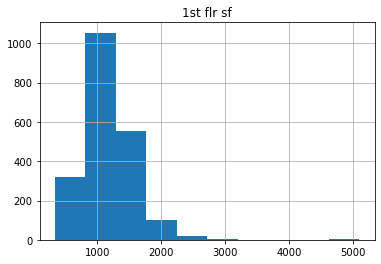

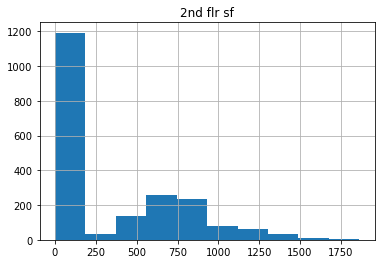

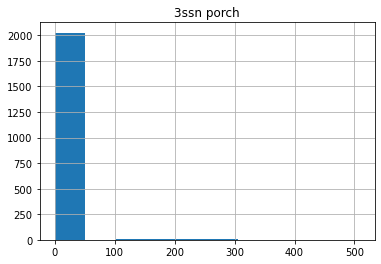

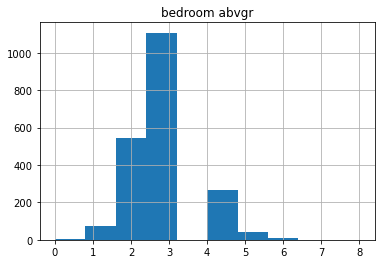

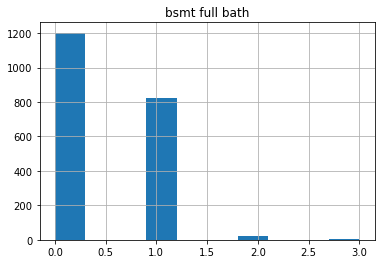

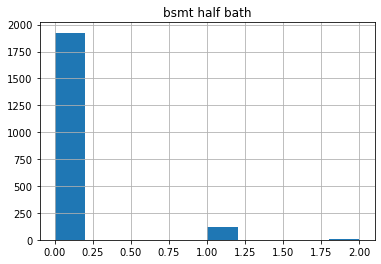

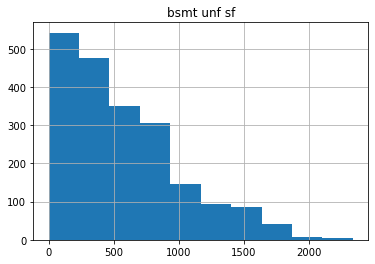

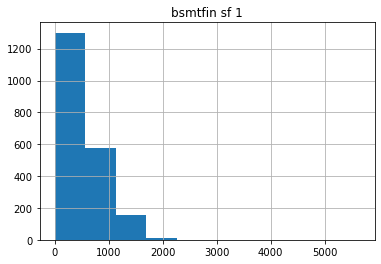

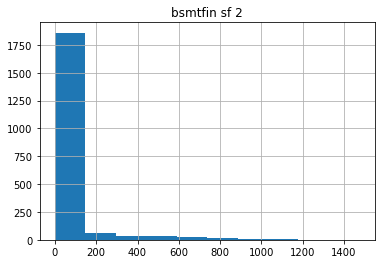

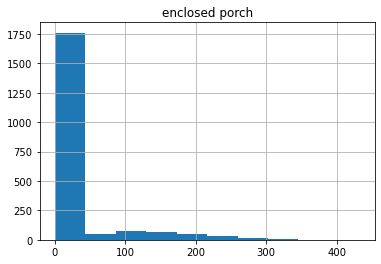

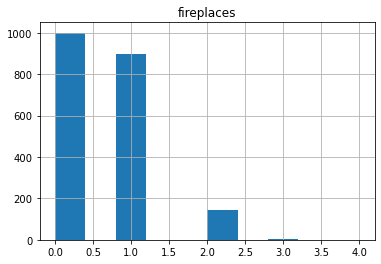

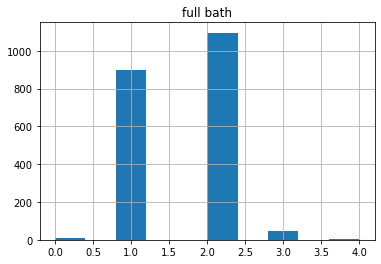

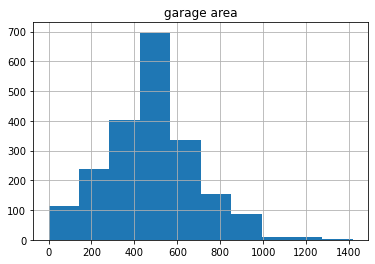

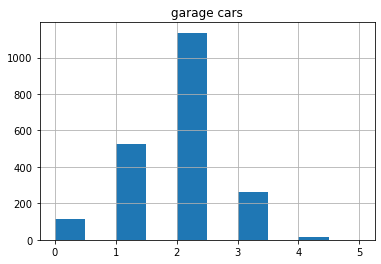

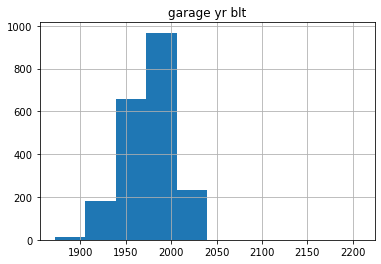

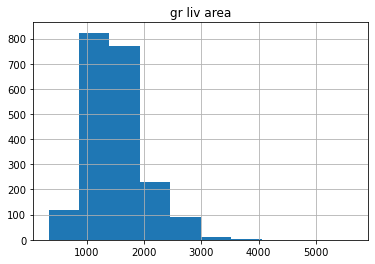

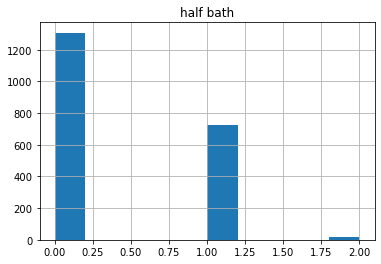

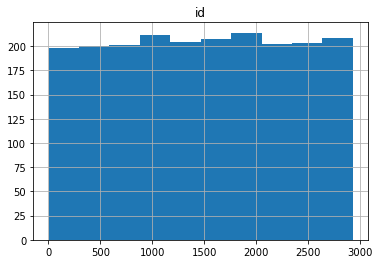

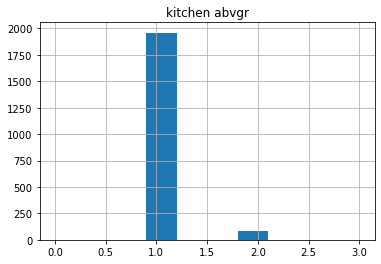

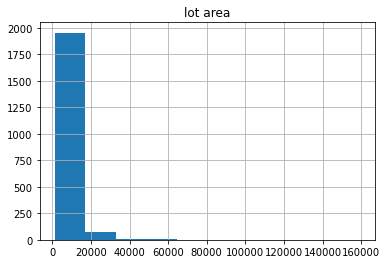

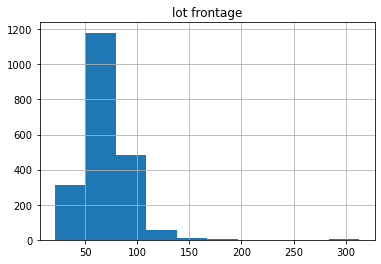

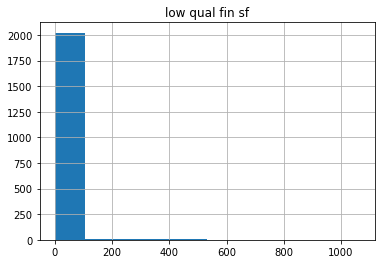

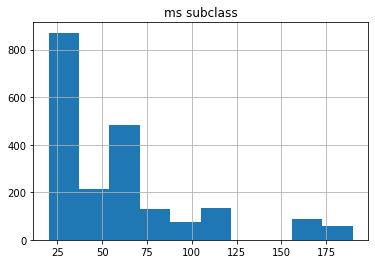

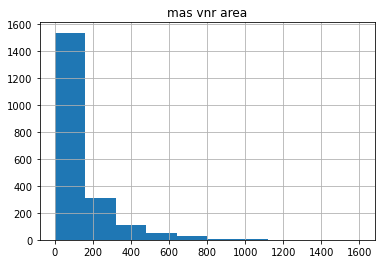

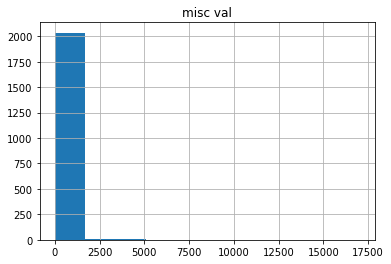

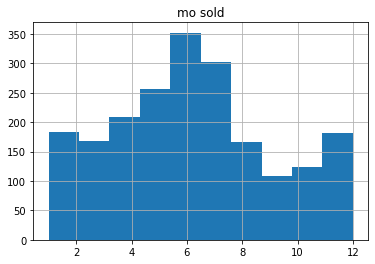

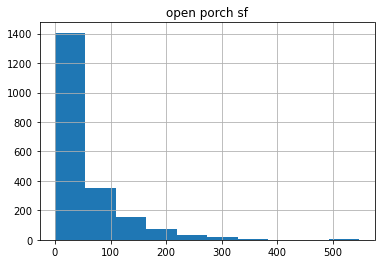

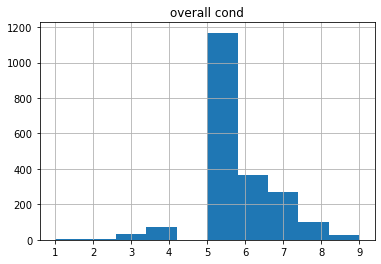

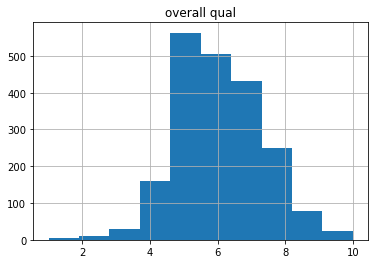

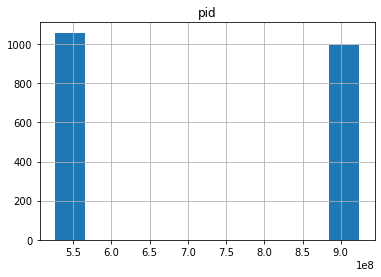

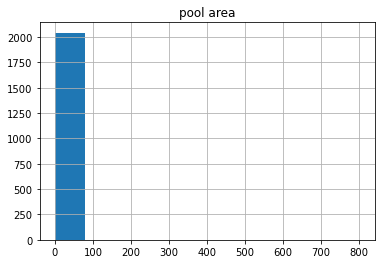

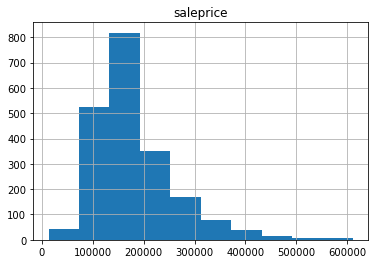

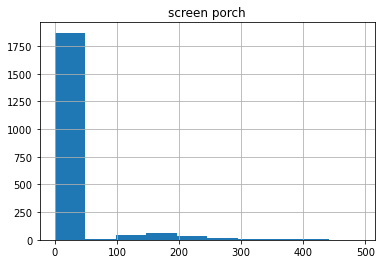

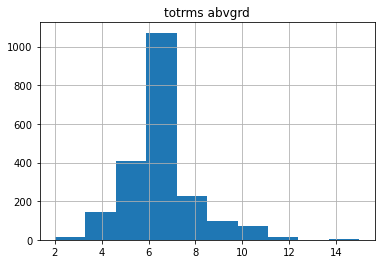

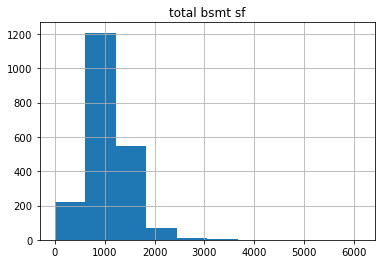

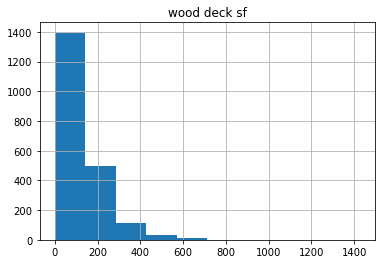

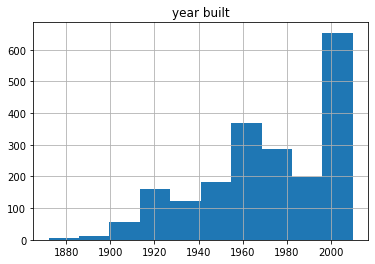

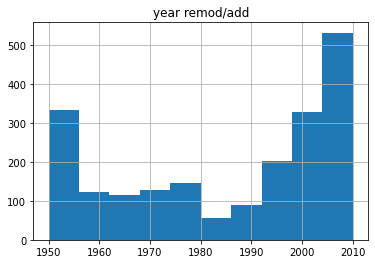

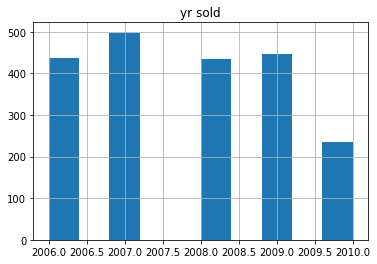

In [69]:
for col in df.select_dtypes(include=np.number):
    df.hist(column=col)


    



# <font color='red'>**********************************************************************************************</font>
# **************************** <span style='background :yellow' >LET'S DEAL WITH OUTLIERS</span> ****************************
# <font color='red'>**********************************************************************************************</font>


In [70]:
df.agg([min,'mean',max])   # looking for potential outliers, maybe there is a better way?
#  with help from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html  

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
min,334.00000,0.00000,0.00000,Grvl,0.00000,1Fam,Ex,Av,0.00000,0.00000,Ex,0.00000,0.00000,0.00000,ALQ,ALQ,N,Artery,Artery,FuseA,0.00000,Ex,Ex,AsbShng,AsbShng,GdPrv,Ex,0.00000,BrkTil,0.00000,Maj1,0.00000,0.00000,Ex,Fin,Ex,2Types,1872.00000,334.00000,0.00000,GasA,Ex,1.5Fin,1.00000,0.00000,Ex,Bnk,Gtl,1300.00000,Corner,21.00000,IR1,0.00000,20.00000,A (agr),0.00000,BrkCmn,Elev,0.00000,1.00000,Blmngtn,0.00000,1.00000,1.00000,526301100.00000,N,0.00000,Ex,ClyTile,Flat,COD,12789.00000,0.00000,Grvl,2.00000,0.00000,AllPub,0.00000,1872.00000,1950.00000,2006.00000
mean,1164.48805,329.32911,2.59142,NaN,2.84349,NaN,NaN,NaN,0.42711,0.06338,NaN,567.45149,442.08484,47.93564,NaN,NaN,NaN,NaN,NaN,NaN,22.57192,NaN,NaN,NaN,NaN,NaN,NaN,0.59093,NaN,1.57728,NaN,473.44076,1.77572,NaN,NaN,NaN,NaN,1976.70795,1499.33008,0.37104,NaN,NaN,NaN,1474.03364,1.04291,NaN,NaN,NaN,10065.20819,NaN,68.87744,NaN,5.51292,57.00878,NaN,98.62652,NaN,NaN,51.57435,6.21989,NaN,47.55680,5.56216,6.11214,713590006.09166,NaN,2.39785,NaN,NaN,NaN,NaN,181469.70161,16.51146,NaN,6.43588,1057.47196,NaN,93.83374,1971.70892,1984.19015,2007.77572
max,5095.00000,1862.00000,508.00000,Pave,8.00000,TwnhsE,TA,No,3.00000,2.00000,TA,2336.00000,5644.00000,1474.00000,Unf,Unf,Y,RRNn,RRNn,SBrkr,432.00000,TA,TA,WdShing,Wd Shng,NA,TA,4.00000,Wood,4.00000,Typ,1418.00000,5.00000,TA,Unf,TA,NA,2207.00000,5642.00000,2.00000,Wall,TA,SLvl,2930.00000,3.00000,TA,Lvl,Sev,159000.00000,Inside,313.00000,Reg,1064.00000,190.00000,RM,1600.00000,Stone,TenC,17000.00000,12.00000,Veenker,547.00000,9.00000,10.00000,924152030.00000,Y,800.00000,TA,WdShngl,Shed,WD,611657.00000,490.00000,Pave,15.00000,6110.00000,NoSewr,1424.00000,2010.00000,2010.00000,2010.00000


In [71]:
# 1st flr sf
# bedroom abvgr
# bsmt full bath
# bsmt unf sf
# bsmtfin sf 1
# bsmtfin sf 2 - what is this?
# fireplaces
# garage area	
# gr liv area
# lot area
# lot frontage
# low qual fin sf - weird?
# mas vnr area - weird?
# open porch sf
# saleprice
# totrms abvgrd
# wood deck sf

In [72]:
df[df['1st flr sf']>2_400].sort_values(['1st flr sf'])  
# Only 4 above 3k sq ft
# How does this affect our saleprice?
# Do they / how do they affect our saleprice?

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
1164,2402,0,0,NA,2,1Fam,TA,Gd,1.00000,0.00000,Ex,788.00000,1767.00000,539.00000,GLQ,ALQ,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NA,Gd,2,PConc,2,Typ,672.00000,3.00000,TA,Fin,TA,Attchd,2008.00000,2402,0,GasA,Ex,1Story,424,1,Ex,Lvl,Gtl,15431,Inside,105.00000,Reg,0,20,RL,200.00000,Stone,NA,0,4,NridgHt,72,5,10,528106020,Y,0,NA,CompShg,Hip,WD,555000,170,Pave,10,3094.00000,AllPub,0,2008,2008,2009
1647,2452,0,0,NA,3,1Fam,TA,No,2.00000,0.00000,Ex,480.00000,1972.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,MnPrv,Gd,1,PConc,2,Typ,886.00000,3.00000,TA,Fin,TA,Attchd,2003.00000,2452,0,GasA,Ex,1Story,449,1,Ex,Lvl,Gtl,15274,Corner,110.00000,IR1,0,20,RL,724.00000,BrkFace,NA,0,7,NridgHt,116,5,9,528166090,Y,0,NA,CompShg,Hip,WD,445000,0,Pave,10,2452.00000,AllPub,0,2003,2003,2009
1058,2464,0,0,NA,4,1Fam,TA,Gd,1.00000,0.00000,Ex,195.00000,1728.00000,495.00000,GLQ,BLQ,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Ex,1,PConc,2,Typ,650.00000,3.00000,TA,Fin,TA,Attchd,2007.00000,2464,1,GasA,Ex,1Story,1057,1,Ex,Lvl,Gtl,13693,Inside,105.00000,Reg,0,20,RL,554.00000,Stone,NA,0,8,NridgHt,78,5,8,528110110,Y,0,NA,CompShg,Hip,WD,417500,0,Pave,9,2418.00000,AllPub,358,2007,2007,2008
685,2490,0,0,NA,2,1Fam,TA,Gd,1.00000,0.00000,Ex,300.00000,2158.00000,0.00000,GLQ,Unf,Y,PosN,PosN,SBrkr,0,TA,Ex,VinylSd,VinylSd,GdPrv,Gd,2,PConc,2,Typ,795.00000,3.00000,TA,Fin,TA,Attchd,2005.00000,2490,0,GasA,Ex,1Story,514,1,Ex,Lvl,Gtl,11128,Corner,85.00000,Reg,0,20,RL,198.00000,Stone,NA,0,10,Somerst,226,5,9,528441090,Y,0,NA,CompShg,Hip,WD,468000,0,Pave,9,2458.00000,AllPub,70,2005,2006,2009
623,2492,0,0,NA,2,1Fam,TA,Gd,1.00000,0.00000,Ex,346.00000,2146.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Ex,CemntBd,CmentBd,NA,Ex,1,PConc,2,Typ,949.00000,3.00000,TA,Fin,TA,Attchd,2004.00000,2492,1,GasA,Ex,1Story,457,1,Ex,HLS,Mod,14836,Inside,100.00000,IR1,0,20,RL,730.00000,Stone,NA,0,2,NridgHt,235,5,10,528176030,Y,0,NA,CompShg,Hip,WD,552000,0,Pave,8,2492.00000,AllPub,226,2004,2005,2009
786,2497,0,0,NA,2,1Fam,TA,Gd,1.00000,0.00000,Gd,0.00000,1632.00000,829.00000,ALQ,Rec,Y,Norm,Norm,SBrkr,0,TA,Gd,BrkFace,BrkFace,NA,Gd,2,CBlock,2,Typ,676.00000,2.00000,TA,RFn,TA,Attchd,1981.00000,2497,0,GasA,Gd,1Story,1861,1,Gd,Lvl,Gtl,17778,Inside,94.00000,IR1,0,20,RL,0.00000,None,NA,0,3,Veenker,0,5,8,533350020,Y,0,NA,CompShg,Hip,WD,373000,0,Pave,7,2461.00000,AllPub,266,1981,1981,2007
913,2515,0,0,NA,4,1Fam,TA,No,1.00000,0.00000,TA,816.00000,1219.00000,0.00000,Rec,Unf,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,NA,TA,2,PConc,3,Maj1,484.00000,2.00000,TA,RFn,TA,Attchd,1975.00000,2515,0,GasA,TA,1Story,2230,2,TA,Lvl,Gtl,32668,CulDSac,55.22857,IR1,0,20,RL,0.00000,None,NA,0,3,Crawfor,0,3,6,909475070,Y,0,NA,CompShg,Hip,WD,200624,0,Pave,9,2035.00000,AllPub,0,1957,1975,2007
30,2524,0,0,NA,4,1Fam,TA,No,1.00000,0.00000,Gd,1420.00000,1104.00000,0.00000,ALQ,Unf,Y,PosN,Norm,SBrkr,0,TA,Gd,BrkFace,BrkFace,MnPrv,Gd,1,PConc,2,Typ,542.00000,2.00000,TA,Fin,TA,Attchd,1981.00000,2524,1,GasA,TA,1Story,380,1,Gd,Lvl,Gtl,9600,Inside,80.00000,Reg,0,20,RL,0.00000,None,NA,0,7,NWAmes,120,5,8,527355150,Y,0,NA,WdSh

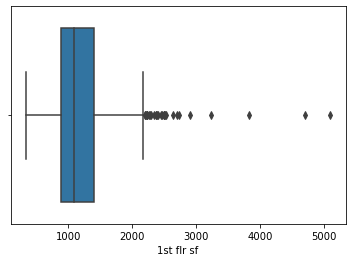

In [73]:
sns.boxplot(x=df['1st flr sf']) ; 
# The shows a lot of outliers, but I dont know if I need ot get rid of them?

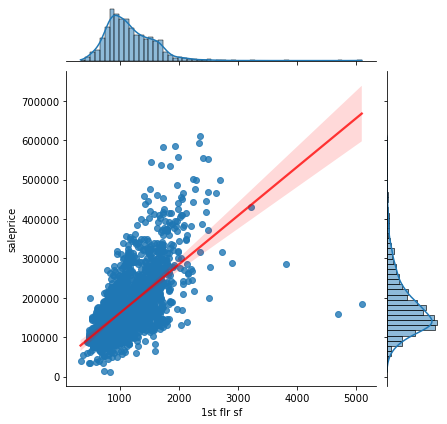

In [74]:
sns.jointplot(x=df['1st flr sf'],y=df['saleprice'],
              kind="reg",
              #scatter_kws={'color':'orange','alpha':0.77}
              line_kws={'color':'red','alpha':0.77}
              );
# This is super cool! https://ajaytech.co/2020/09/28/8780/
# with help from https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot


In [75]:
df[df['bedroom abvgr']>6].sort_values(['bedroom abvgr'])  
# 5 and 6 isnt unusual.  There is one with 8 bedrooms.  Index # 858
# Does the one / how does the one affect our saleprice?

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
858,1440,1440,0,Pave,8,2fmCon,Fa,No,0.00000,0.00000,TA,1184.00000,256.00000,0.00000,LwQ,Unf,Y,Feedr,Norm,FuseA,0,TA,Fa,VinylSd,VinylSd,NA,NA,0,CBlock,2,Typ,0.00000,0.00000,NA,NA,NA,NA,1914.00000,3395,0,GasA,Ex,2.5Fin,2195,2,Fa,Bnk,Gtl,10896,Inside,60.00000,Reg,515,190,RH,0.00000,None,NA,0,3,SWISU,110,7,6,909176080,N,0,NA,CompShg,Hip,WD,200000,0,Pave,14,1440.00000,AllPub,0,1914,1995,2007


In [76]:
df[df['bsmt full bath']>2].sort_values(['bsmt full bath'])
# 2 isnt unusual.  There are two with 3 fulls baths
# Does this / how does this affect our saleprice?

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
791,1200,0,0,NA,3,Duplex,Gd,Gd,3.00000,0.00000,Gd,0.00000,1200.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,NA,0,CBlock,3,Typ,0.00000,0.00000,NA,NA,NA,NA,1987.00000,1200,0,GasA,TA,1Story,763,1,TA,Lvl,Gtl,10800,Inside,60.00000,Reg,0,90,RL,0.00000,None,NA,0,3,Edwards,0,5,5,904301060,Y,0,NA,CompShg,Gable,WD,179000,0,Pave,5,1200.00000,AllPub,120,1987,1988,2009
1584,1200,0,0,NA,3,Duplex,Gd,Gd,3.00000,0.00000,Gd,0.00000,1200.00000,0.00000,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,Plywood,Plywood,NA,NA,0,CBlock,3,Typ,0.00000,0.00000,NA,NA,NA,NA,1987.00000,1200,0,GasA,TA,1Story,764,1,TA,Lvl,Gtl,10800,Inside,60.00000,Reg,0,90,RL,0.00000,None,NA,0,3,Edwards,0,5,5,904301070,Y,0,NA,CompShg,Gable,WD,179000,0,Pave,5,1200.00000,AllPub,120,1987,1988,2009


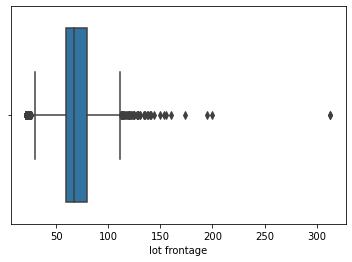

In [77]:
sns.boxplot(x=df['lot frontage']) ;  # Looks like there are some above 300, this isnt terribly helpful since I dont know the effect of the outlier on the sales price




# <font color='red'>**********************************************************************************************</font>
# **************************** <span style='background :yellow' >NON NUMERIC CLEANUP</span> ****************************
# <font color='red'>**********************************************************************************************</font>


In [78]:
# Looking at the documentation, we can binarize 'Street' and 'Central Air' 

In [79]:
df['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [80]:
df['central air'].value_counts()

Y    1910
N     141
Name: central air, dtype: int64

In [81]:
df['street'] = df['street'].map({'Pave':1, 'Grvl':0})
df_test['street'] = df_test['street'].map({'Pave':1, 'Grvl':0})

In [82]:
df['central air'] = df['central air'].map({'Y':1, 'N':0})
df_test['central air'] = df_test['central air'].map({'Y':1, 'N':0})

In [83]:
df['street'].value_counts()

1    2044
0       7
Name: street, dtype: int64

In [84]:
df['central air'].value_counts()

1    1910
0     141
Name: central air, dtype: int64

In [85]:
df.isnull().sum()

1st flr sf         0
2nd flr sf         0
3ssn porch         0
alley              0
bedroom abvgr      0
bldg type          0
bsmt cond          0
bsmt exposure      0
bsmt full bath     0
bsmt half bath     0
bsmt qual          0
bsmt unf sf        0
bsmtfin sf 1       0
bsmtfin sf 2       0
bsmtfin type 1     0
bsmtfin type 2     0
central air        0
condition 1        0
condition 2        0
electrical         0
enclosed porch     0
exter cond         0
exter qual         0
exterior 1st       0
exterior 2nd       0
fence              0
fireplace qu       0
fireplaces         0
foundation         0
full bath          0
functional         0
garage area        0
garage cars        0
garage cond        0
garage finish      0
garage qual        0
garage type        0
garage yr blt      0
gr liv area        0
half bath          0
heating            0
heating qc         0
house style        0
id                 0
kitchen abvgr      0
kitchen qual       0
land contour       0
land slope   

In [86]:
df_test.isnull().sum()

1st flr sf           0
2nd flr sf           0
3ssn porch           0
alley                0
bedroom abvgr        0
bldg type            0
bsmt cond            0
bsmt exposure        0
bsmt full bath       0
bsmt half bath       0
bsmt qual            0
bsmt unf sf          0
bsmtfin sf 1         0
bsmtfin sf 2         0
bsmtfin type 1       0
bsmtfin type 2       0
central air          0
condition 1          0
condition 2          0
electrical           1
enclosed porch       0
exter cond           0
exter qual           0
exterior 1st         0
exterior 2nd         0
fence                0
fireplace qu         0
fireplaces           0
foundation           0
full bath            0
functional           0
garage area          0
garage cars          0
garage cond          0
garage finish        0
garage qual          0
garage type          0
garage yr blt        0
gr liv area          0
half bath            0
heating              0
heating qc           0
house style          0
id         

In [87]:
df_test['electrical'] = df_test['electrical'].fillna(0) 

In [88]:
####****************************************************************************######

In [89]:
obj_cols = df.dtypes[df.dtypes == 'object'].index
obj_cols

Index(['alley', 'bldg type', 'bsmt cond', 'bsmt exposure', 'bsmt qual',
       'bsmtfin type 1', 'bsmtfin type 2', 'condition 1', 'condition 2',
       'electrical', 'exter cond', 'exter qual', 'exterior 1st',
       'exterior 2nd', 'fence', 'fireplace qu', 'foundation', 'functional',
       'garage cond', 'garage finish', 'garage qual', 'garage type', 'heating',
       'heating qc', 'house style', 'kitchen qual', 'land contour',
       'land slope', 'lot config', 'lot shape', 'ms zoning', 'mas vnr type',
       'misc feature', 'neighborhood', 'paved drive', 'pool qc', 'roof matl',
       'roof style', 'sale type', 'utilities'],
      dtype='object')

In [90]:
# accoring to documentation, these columns are ordinal. So we should be able to assign meaningful values where they aren't already numeric
# Lot Shape, Utilities, Land Slope, Overall Qual (num), Overall Cond(num), Exter Qual, Exter Cond, Bsmt Qual, 
# Bsmt Cond, Bsmt Exposure, BsmtFin Type 1,BsmtFinType 2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, 
# Garage Finish, Garage Qual, Garage Cond, Paved Drive, Pool QC, Fence 

# it looks like Fireplace Qu, Garage Qual, Garage Cond,  Pool QC, Fence all use the same scale
# so do BsmtFin Type 1, and BsmtFinType 2
# so do Exter Qual, Exter Cond, KitchenQual
# so do Bsmt Qual, Bsmt Cond

In [91]:
df['fireplace qu'].value_counts()

NA    1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: fireplace qu, dtype: int64

In [92]:
fix_dict_1 = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA': 0} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix1 = ['fireplace qu','garage qual','garage cond','pool qc']  # create a list of the columns to fix

In [93]:
for col in cols_to_fix1:
    df[col] = df[col].replace(fix_dict_1)
    df_test[col] = df_test[col].replace(fix_dict_1)

In [94]:
df['bsmtfin type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: bsmtfin type 1, dtype: int64

In [95]:
fix_dict_2 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix2 = ['bsmtfin type 1','bsmtfin type 2']  # create a list of the columns to fix

In [96]:
for col in cols_to_fix2:
    df[col] = df[col].replace(fix_dict_2)
    df_test[col] = df_test[col].replace(fix_dict_2)

In [97]:
fix_dict_3 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix3 = ['exter qual','exter cond','kitchen qual','heating qc']  # create a list of the columns to fix

In [98]:
for col in cols_to_fix3:
    df[col] = df[col].replace(fix_dict_3)
    df_test[col] = df_test[col].replace(fix_dict_3)

In [99]:
fix_dict_4 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0} # create a dictionary of the values in the data and the numeric values you want them to have
cols_to_fix4 = ['bsmt qual', 'bsmt cond']  # create a list of the columns to fix

In [100]:
for col in cols_to_fix4:
    df[col] = df[col].replace(fix_dict_4)
    df_test[col] = df_test[col].replace(fix_dict_4)

In [101]:
###  all of the rest are on different scales, so we could throw them all in one dictionary and then use the one big dictionary to update the remaining columns

In [102]:
fix_dict_5= {
    #lot shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
#garage finish    
    'Fin':3,
    'RFn':2,
    'Unf':1,
    'NA':0,
#utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,   
#land slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
#paved drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
#electrical
    'SBrkr':5,
    'FuseA':4,
    'FuseF':3,
    'FuseP':2,
    'Mix':1,
#fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1,
#functional
    'Typ':8,
    'Min1':7,
    'Min2':6,
    'Mod':5,
    'Maj1':4,
    'Maj2':3,
    'Sev':2,
    'Sal':1,
#garage finish    
    'Gd':3,
    'Av':3,
    'Mn':2,
    'No':1,
    'NA':0,
}

In [103]:
cols_to_fix5 = ['lot shape','garage finish','utilities','land slope','paved drive','electrical','fence','functional', 'bsmt exposure']  # create a list of the columns to fix

In [104]:
for col in cols_to_fix5:
    df[col] = df[col].replace(fix_dict_5)
    df_test[col] = df_test[col].replace(fix_dict_5)

In [105]:
########################******************************************************########################
########################******************************************************########################
########################******************************************************########################
# Before creating dummies for each remaining columns, let's make sure that all available options are 
# on both sets of data, figure out what to do if something is missing from one set or the other
# and make sure that we need to create so many additional columns
########################******************************************************########################
########################******************************************************########################
########################******************************************************########################

In [106]:
print(df['alley'].value_counts()),
print(df_test['alley'].value_counts())
# Looks like they have the same values

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64
NA      820
Grvl     35
Pave     23
Name: alley, dtype: int64


In [107]:
df_td = df   #set df_td = df, then put in to numeric categories and look for correlation

fix_dict_alley = {'Grvl':2,'Pave':1,'NA':0} # create a dictionary of the values in the data and the numeric values you want them to have
df['alley'] = df['alley'].replace(fix_dict_alley)
df_test['alley'] = df_test['alley'].replace(fix_dict_alley)

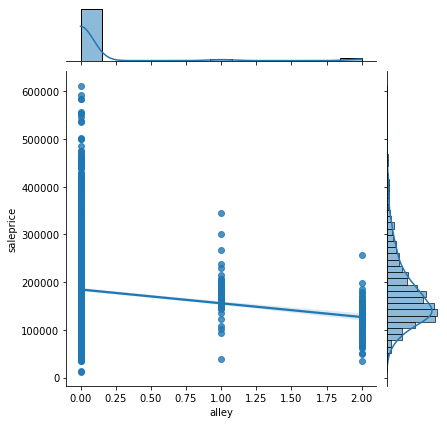

In [108]:
sns.jointplot(x=df_td['alley'],y=df_td['saleprice'],
              kind="reg",
              );
# This is super cool! https://ajaytech.co/2020/09/28/8780/
# Looks like Gravel alleys VS Paved alleys could have a small affect on sale price
# creating dummies

In [109]:
print(df['bldg type'].value_counts()),
print(df_test['bldg type'].value_counts())
# Looks like they have the same values
# but the documentation says that "Twnhs" should probably be "TwnhsI"

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg type, dtype: int64
1Fam      724
TwnhsE     72
Duplex     34
Twnhs      32
2fmCon     16
Name: bldg type, dtype: int64


In [110]:
df_td = df   #set df_td = df, then put in to numeric categories and look for correlation

fix_dict_bldg_type = {'1Fam':5,'TwnhsE':4,'Duplex':3,'Twnhs':2,'2fmCon':1} # create a dictionary of the values in the data and the numeric values you want them to have
# df_td['bldg type'] = df['bldg type'].replace(fix_dict_bldg_type)

# sns.jointplot(x=df_td['bldg type'],y=df_td['saleprice'],
#               kind="reg",
#               );
# # Looks like there is some affect on slaeprice, creting dummie 

In [111]:
df.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,725,754,0,0,3,1Fam,3,1,0.00000,0.00000,3,192.00000,533.00000,0.00000,6,1,1,RRAe,Norm,5,0,3,4,HdBoard,Plywood,0,0,0,CBlock,2,8,475.00000,2.00000,3,2,3,Attchd,1976.00000,1479,1,GasA,5,2Story,109,1,4,Lvl,3,13517,CulDSac,55.22857,3,0,60,RL,289.00000,BrkFace,NA,0,3,Sawyer,44,8,6,533352170,2,0,0,CompShg,Gable,WD,130500,0,1,6,725.00000,4,0,1976,2005,2010
1,913,1209,0,0,4,1Fam,3,1,1.00000,0.00000,4,276.00000,637.00000,0.00000,6,1,1,Norm,Norm,5,0,3,4,VinylSd,VinylSd,0,3,1,PConc,2,8,559.00000,2.00000,3,2,3,Attchd,1997.00000,2122,1,GasA,5,2Story,544,1,4,Lvl,3,11492,CulDSac,43.00000,3,0,60,RL,132.00000,BrkFace,NA,0,4,SawyerW,74,5,7,531379050,2,0,0,CompShg,Gable,WD,220000,0,1,8,913.00000,4,0,1996,1997,2009
2,1057,0,0,0,3,1Fam,3,1,1.00000,0.00000,3,326.00000,731.00000,0.00000,6,1,1,Norm,Norm,5,0,4,3,VinylSd,VinylSd,0,0,0,CBlock,1,8,246.00000,1.00000,3,1,3,Detchd,1953.00000,1057,0,GasA,3,1Story,153,1,4,Lvl,3,7922,Inside,68.00000,4,0,20,RL,0.00000,None,NA,0,1,NAmes,52,7,5,535304180,2,0,0,CompShg,Gable,WD,109000,0,1,5,1057.00000,4,0,1953,2007,2010
3,744,700,0,0,3,1Fam,3,1,0.00000,0.00000,4,384.00000,0.00000,0.00000,1,1,1,Norm,Norm,5,0,3,3,VinylSd,VinylSd,0,0,0,PConc,2,8,400.00000,2.00000,3,3,3,BuiltIn,2007.00000,1444,1,GasA,4,2Story,318,1,3,Lvl,3,9802,Inside,73.00000,4,0,60,RL,0.00000,None,NA,0,4,Timber,0,5,5,916386060,2,0,0,CompShg,Gable,WD,174000,0,1,7,384.00000,4,100,2006,2007,2010
4,831,614,0,0,3,1Fam,4,1,0.00000,0.00000,2,676.00000,0.00000,0.00000,1,1,1,Norm,Norm,5,0,3,3,Wd Sdng,Plywood,0,0,0,PConc,2,8,484.00000,2.00000,3,1,3,Detchd,1957.00000,1445,0,GasA,3,1.5Fin,255,1,3,Lvl,3,14235,Inside,82.00000,3,0,50,RL,0.00000,None,NA,0,3,SawyerW,59,8,6,906425045,0,0,0,CompShg,Gable,WD,138500,0,1,6,676.00000,4,0,1900,1993,2010


In [112]:
df_test.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold
0,908,1020,0,2,4,2fmCon,3,1,0,0,2,1020,0,0,1,1,0,Norm,Norm,2,112,2,3,AsbShng,AsbShng,0,0,0,Stone,2,8,440,1,1,1,1,Detchd,1910.00000,1928,0,GasA,4,2Story,2658,2,2,Lvl,3,9142,Inside,69.00000,4,0,190,RM,0.00000,None,NA,0,4,OldTown,60,8,6,902301120,2,0,0,CompShg,Gable,WD,NaN,0,1,9,1020,4,0,1910,1950,2006
1,1967,0,0,0,6,Duplex,3,1,0,0,4,1967,0,0,1,1,1,Norm,Norm,5,0,3,3,Plywood,Plywood,0,0,0,CBlock,2,8,580,2,3,3,3,Attchd,1977.00000,1967,0,GasA,3,1Story,2718,2,3,Lvl,3,9662,Inside,67.49638,3,0,90,RL,0.00000,None,NA,0,8,Sawyer,0,4,5,905108090,2,0,0,CompShg,Gable,WD,NaN,0,1,10,1967,4,170,1977,1977,2006
2,664,832,0,0,3,1Fam,4,3,1,0,4,100,554,0,6,1,1,Norm,Norm,5,0,3,4,VinylSd,VinylSd,0,4,1,PConc,2,8,426,2,3,2,3,Attchd,2006.00000,1496,1,GasA,5,2Story,2414,1,4,Lvl,3,17104,Inside,58.00000,3,0,60,RL,0.00000,None,NA,0,9,Gilbert,24,5,7,528218130,2,0,0,CompShg,Gable,New,NaN,0,1,7,654,4,100,2006,2006,2006
3,968,0,0,0,2,1Fam,3,1,0,0,3,968,0,0,1,1,1,Norm,Norm,5,184,3,4,Wd Sdng,Wd Sdng,0,0,0,CBlock,1,8,480,2,3,1,2,Detchd,1935.00000,968,0,GasA,3,1Story,1989,1,3,Lvl,3,8520,Inside,60.00000,4,0,30,RM,0.00000,None,NA,0,7,OldTown,0,6,5,902207150,0,0,0,CompShg,Gable,WD,NaN,0,1,5,968,4,0,1923,2006,2007
4,1394,0,0,0,3,1Fam,3,1,1,0,4,785,609,0,4,1,1,Norm,Norm,5,0,3,3,Plywood,Plywood,0,4,2,CBlock,1,8,514,2,3,2,3,Attchd,1963.00000,1394,1,GasA,4,1Story,625,1,3,Lvl,3,9500,Inside,67.49638,3,0,20,RL,247.00000,BrkFace,NA,0,7,NAmes,76,5,6,535105100,2,0,0,CompShg,Gable,WD,NaN,185,1,6,1394,4,0,1963,1963,2009


In [113]:
print(df['condition 1'].value_counts()),
print(df_test['condition 1'].value_counts())
# Looks like they have the same values

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition 1, dtype: int64
Norm      755
Feedr      55
Artery     22
RRAn       14
PosN       11
PosA        8
RRAe        7
RRNn        3
RRNe        3
Name: condition 1, dtype: int64


In [114]:
# Some of these are listed as positive specifically, and normal, but these others dont sounds positive.
# After some googling, it looks like there are definitely positive, negative, normal conditions.  
# It looks like the recomendation is to score them as 2 for postive, 1 for normal, and 0 for negative
# then add the score for each property and use the combined score in the model.

     # 0  Artery	Adjacent to arterial street
     # 0  Feedr	Adjacent to feeder street	
     # 1  Norm	Normal	
     # 0  RRNn	Within 200' of North-South Railroad
     # 0  RRAn	Adjacent to North-South Railroad
     # 2  PosN	Near positive off-site feature--park, greenbelt, etc.
     # 2  PosA	Adjacent to postive off-site feature
     # 0  RRNe	Within 200' of East-West Railroad
     # 0  RRAe	Adjacent to East-West Railroad

In [115]:
fix_dict_conds = {'Artery':0,
                  'Feedr':0,
                  'Norm':1,
                  'RRNn':0,
                  'RRAn':0,
                  'PosN':2,
                  'PosA':2,
                  'RRNe':0,
                  'RRAe':0   } # create a dictionary of the values in the data and the numeric values you want them to have
df['condition 1'] = df['condition 1'].replace(fix_dict_conds)
df_test['condition 1'] = df_test['condition 1'].replace(fix_dict_conds)
df['condition 2'] = df['condition 2'].replace(fix_dict_conds)
df_test['condition 2'] = df_test['condition 2'].replace(fix_dict_conds)

df['conditions'] = df['condition 1'] + df['condition 2']
df_test['conditions'] = df_test['condition 1'] + df_test['condition 2']

In [116]:
print(df['conditions'].value_counts())
print(df_test['conditions'].value_counts())

2    1768
1     224
3      34
0      20
4       5
Name: conditions, dtype: int64
2    755
1    102
3     18
0      2
4      1
Name: conditions, dtype: int64


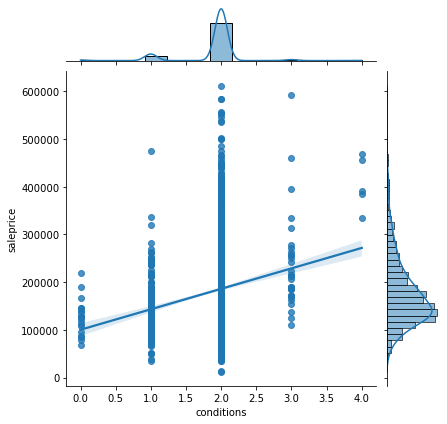

In [117]:
sns.jointplot(x=df['conditions'],y=df_td['saleprice'],
              kind="reg",
              );

In [118]:
# The documentation says that the exterior 1 and exterior 2 data are nominal
# but there are some large differences in mean sale price of ext 1

In [119]:
df.groupby('exterior 1st')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
exterior 1st,,
AsphShn,82375.00000,1
CBlock,93250.00000,2
AsbShng,103183.33333,33
BrkComm,131000.00000,3
Stucco,139712.96296,27
Wd Sdng,142940.88768,276
MetalSd,154402.04834,331
WdShing,155616.82222,45
HdBoard,159582.47333,300


In [120]:
df.groupby('exterior 2nd')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
exterior 2nd,,
CBlock,92000.00000,2
AsbShng,107108.92857,28
AsphShn,132125.00000,3
Brk Cmn,139958.82353,17
Stone,145420.66667,6
Wd Sdng,145654.39695,262
Stucco,147725.33333,30
Wd Shng,154244.44444,63
MetalSd,155978.63580,324


In [121]:
## some of the values from Ext 1 and Ext 2 dont' quite match on the train data, checking the test data next
print(df['exterior 1st'].unique())
print(df['exterior 2nd'].unique())
print(type(df['exterior 1st'].unique()))

print(list(set(df['exterior 1st']) - set(df['exterior 2nd'])))
print(list(set(df['exterior 2nd']) - set(df['exterior 1st'])))

['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']
<class 'numpy.ndarray'>
['BrkComm', 'CemntBd', 'WdShing']
['CmentBd', 'Wd Shng', 'Brk Cmn']


In [122]:
## alot of mis-match on the test data
print(df_test['exterior 1st'].unique())
print(df_test['exterior 2nd'].unique())


print(list(set(df_test['exterior 1st']) - set(df_test['exterior 2nd'])))
print(list(set(df_test['exterior 2nd']) - set(df_test['exterior 1st'])))

['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CemntBd' 'MetalSd' 'HdBoard'
 'BrkComm' 'Stucco' 'WdShing' 'BrkFace' 'PreCast' 'AsphShn']
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CmentBd' 'MetalSd' 'BrkFace'
 'Stucco' 'HdBoard' 'Wd Shng' 'ImStucc' 'Brk Cmn' 'PreCast' 'CBlock'
 'AsphShn' 'Other']
['BrkComm', 'CemntBd', 'WdShing']
['CmentBd', 'Brk Cmn', 'Other', 'ImStucc', 'Wd Shng', 'CBlock']


In [123]:
# make Ext 2nd values match those of Ext 1st
fix_dict_ext2 = {'Brk Cmn':'BrkComm',
                  'Wd Shng':'WdShing',
                  'CmentBd':'CemntBd'  } # create a dictionary of the values in the data and the numeric values you want them to have
df['exterior 2nd'] = df['exterior 2nd'].replace(fix_dict_ext2)
df_test['exterior 2nd'] = df_test['exterior 2nd'].replace(fix_dict_ext2)

In [124]:
# Lets see if the mean sale price of Ext 1 in train  is similar to that of Ext 2

In [125]:
df.groupby('exterior 1st')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
exterior 1st,,
AsphShn,82375.00000,1
CBlock,93250.00000,2
AsbShng,103183.33333,33
BrkComm,131000.00000,3
Stucco,139712.96296,27
Wd Sdng,142940.88768,276
MetalSd,154402.04834,331
WdShing,155616.82222,45
HdBoard,159582.47333,300


In [126]:
df.groupby('exterior 2nd')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
exterior 2nd,,
CBlock,92000.00000,2
AsbShng,107108.92857,28
AsphShn,132125.00000,3
BrkComm,139958.82353,17
Stone,145420.66667,6
Wd Sdng,145654.39695,262
Stucco,147725.33333,30
WdShing,154244.44444,63
MetalSd,155978.63580,324


In [127]:
# the mean sale price of Ext 1 and Ext 2 are similar but there are a few big differences.  
# I'm going to assign each it's own Ordinal value, then, similar to what we did with 
# conditions, combine the two columns

In [128]:
    #    AsbShng	Asbestos Shingles
    #    AsphShn	Asphalt Shingles
    #    BrkComm	Brick Common
    #    BrkFace	Brick Face
    #    CBlock	Cinder Block
    #    CemntBd	Cement Board
    #    HdBoard	Hard Board
    #    ImStucc	Imitation Stucco
    #    MetalSd	Metal Siding
    #    Other	Other
    #    Plywood	Plywood
    #    PreCast	PreCast	
    #    Stone	Stone
    #    Stucco	Stucco
    #    VinylSd	Vinyl Siding
    #    Wd Sdng	Wood Siding
    #    WdShing	Wood Shingles

In [129]:
fix_dict_ext1 = {
    'AsphShn':1,
    'CBlock':2,
    'AsbShng':3,
    'BrkComm':4,
    'Stucco':5,
    'Wd Sdng':6,
    'MetalSd':7,
    'PreCast':8,
    'WdShing':9,
    'HdBoard':10,
    'Plywood':11,
    'BrkFace':12,
    'VinylSd':13,
    'CemntBd':14,
    'Stone':15,
    'ImStucc':16  } # create a dictionary of the values in the data and the numeric values you want them to have
df['exterior 1st'] = df['exterior 1st'].replace(fix_dict_ext1)
df_test['exterior 1st'] = df_test['exterior 1st'].replace(fix_dict_ext1)


In [130]:
print(df_test['exterior 1st'].unique())
print(df_test['exterior 1st'].value_counts())
# Not sure what to do about PreCast, maybe just assume the mean sale price? stick it in the middle?
df['saleprice'].mean()

[ 3 11 13  6 14  7 10  4  5  9 12  8  1]
13    302
6     144
10    142
7     119
11     69
14     35
12     24
5      16
3      11
9      11
4       3
8       1
1       1
Name: exterior 1st, dtype: int64


181469.70160897123

In [131]:

fix_dict_ext2 = {
    'Other':0,
    'CBlock':1,
    'AsbShng':2,
    'AsphShn':3,
    'BrkComm':4,
    'Stone':5,
    'Wd Sdng':6,
    'Stucco':7,
    'PreCast':8,
    'WdShing':9,
    'MetalSd':10,
    'HdBoard':11,
    'Plywood':12,
    'BrkFace':13,
    'VinylSd':14,
    'ImStucc':15,
    'CemntBd':16} # create a dictionary of the values in the data and the numeric values you want them to have


df['exterior 2nd'] = df['exterior 2nd'].replace(fix_dict_ext2)
df_test['exterior 2nd'] = df_test['exterior 2nd'].replace(fix_dict_ext2)


In [132]:
print(df_test['exterior 2nd'].unique())
print(df_test['exterior 2nd'].value_counts())
# Not sure what to do about PreCast, maybe just assume the mean sale price? stick it in the middle?


[ 2 12 14  6 16 10 13  7 11  9 15  4  8  1  3  0]
14    294
6     135
11    131
10    123
12     89
16     35
9      18
7      17
13     13
2      10
4       5
15      4
8       1
1       1
3       1
0       1
Name: exterior 2nd, dtype: int64


In [133]:

df['exterior 2nd'] = df['exterior 2nd'].replace(fix_dict_ext2)
df_test['exterior 2nd'] = df_test['exterior 2nd'].replace(fix_dict_ext2)

df['exteriors'] = df['exterior 1st'] + df['exterior 2nd']
df_test['exteriors'] = df_test['exterior 1st'] + df_test['exterior 2nd']

In [134]:
print(df['foundation'].value_counts())

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64


In [135]:
print(df_test['foundation'].value_counts())

PConc     383
CBlock    381
BrkTil     90
Slab       15
Stone       6
Wood        3
Name: foundation, dtype: int64


In [136]:
df.groupby('foundation')['saleprice'].agg(['mean', 'count','min','max']).sort_values(by = 'mean')  
# Think I'll just created dummies for these

,mean,count,min,max
foundation,,,,
Slab,108810.67647,34,13100,284700
BrkTil,129050.19005,221,12789,475000
Stone,143235.20000,5,89000,266500
CBlock,148415.53071,863,34900,410000
Wood,173750.00000,2,145500,202000
PConc,227676.48380,926,63000,611657


In [137]:
df_test.head()

,1st flr sf,2nd flr sf,3ssn porch,alley,bedroom abvgr,bldg type,bsmt cond,bsmt exposure,bsmt full bath,bsmt half bath,bsmt qual,bsmt unf sf,bsmtfin sf 1,bsmtfin sf 2,bsmtfin type 1,bsmtfin type 2,central air,condition 1,condition 2,electrical,enclosed porch,exter cond,exter qual,exterior 1st,exterior 2nd,fence,fireplace qu,fireplaces,foundation,full bath,functional,garage area,garage cars,garage cond,garage finish,garage qual,garage type,garage yr blt,gr liv area,half bath,heating,heating qc,house style,id,kitchen abvgr,kitchen qual,land contour,land slope,lot area,lot config,lot frontage,lot shape,low qual fin sf,ms subclass,ms zoning,mas vnr area,mas vnr type,misc feature,misc val,mo sold,neighborhood,open porch sf,overall cond,overall qual,pid,paved drive,pool area,pool qc,roof matl,roof style,sale type,saleprice,screen porch,street,totrms abvgrd,total bsmt sf,utilities,wood deck sf,year built,year remod/add,yr sold,conditions,exteriors
0,908,1020,0,2,4,2fmCon,3,1,0,0,2,1020,0,0,1,1,0,1,1,2,112,2,3,3,2,0,0,0,Stone,2,8,440,1,1,1,1,Detchd,1910.00000,1928,0,GasA,4,2Story,2658,2,2,Lvl,3,9142,Inside,69.00000,4,0,190,RM,0.00000,None,NA,0,4,OldTown,60,8,6,902301120,2,0,0,CompShg,Gable,WD,NaN,0,1,9,1020,4,0,1910,1950,2006,2,5
1,1967,0,0,0,6,Duplex,3,1,0,0,4,1967,0,0,1,1,1,1,1,5,0,3,3,11,12,0,0,0,CBlock,2,8,580,2,3,3,3,Attchd,1977.00000,1967,0,GasA,3,1Story,2718,2,3,Lvl,3,9662,Inside,67.49638,3,0,90,RL,0.00000,None,NA,0,8,Sawyer,0,4,5,905108090,2,0,0,CompShg,Gable,WD,NaN,0,1,10,1967,4,170,1977,1977,2006,2,23
2,664,832,0,0,3,1Fam,4,3,1,0,4,100,554,0,6,1,1,1,1,5,0,3,4,13,14,0,4,1,PConc,2,8,426,2,3,2,3,Attchd,2006.00000,1496,1,GasA,5,2Story,2414,1,4,Lvl,3,17104,Inside,58.00000,3,0,60,RL,0.00000,None,NA,0,9,Gilbert,24,5,7,528218130,2,0,0,CompShg,Gable,New,NaN,0,1,7,654,4,100,2006,2006,2006,2,27
3,968,0,0,0,2,1Fam,3,1,0,0,3,968,0,0,1,1,1,1,1,5,184,3,4,6,6,0,0,0,CBlock,1,8,480,2,3,1,2,Detchd,1935.00000,968,0,GasA,3,1Story,1989,1,3,Lvl,3,8520,Inside,60.00000,4,0,30,RM,0.00000,None,NA,0,7,OldTown,0,6,5,902207150,0,0,0,CompShg,Gable,WD,NaN,0,1,5,968,4,0,1923,2006,2007,2,12
4,1394,0,0,0,3,1Fam,3,1,1,0,4,785,609,0,4,1,1,1,1,5,0,3,3,11,12,0,4,2,CBlock,1,8,514,2,3,2,3,Attchd,1963.00000,1394,1,GasA,4,1Story,625,1,3,Lvl,3,9500,Inside,67.49638,3,0,20,RL,247.00000,BrkFace,NA,0,7,NAmes,76,5,6,535105100,2,0,0,CompShg,Gable,WD,NaN,185,1,6,1394,4,0,1963,1963,2009,2,23


In [138]:
print(df['garage type'].value_counts())

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garage type, dtype: int64


In [139]:
print(df_test['garage type'].value_counts())

Attchd     518
Detchd     246
BuiltIn     53
NA          44
Basment      9
2Types       4
CarPort      4
Name: garage type, dtype: int64


In [140]:
df.groupby('garage type')['saleprice'].agg(['mean', 'count','min','max']).sort_values(by = 'mean')  
# not surprised that carport is on the low end of the mean, followed by detached
# not surprised the Attached and BuiltIn are on the higher end
# but I am surprised by the large ranges in min/mx
# Think I'll create dummies for these

,mean,count,min,max
garage type,,,,
CarPort,103823.54545,11,82000,148000
NA,105669.15044,113,34900,200500
Detchd,132132.94776,536,12789,475000
Basment,143242.33333,27,55993,235000
2Types,157184.21053,19,87000,235000
Attchd,205040.19538,1213,13100,611657
BuiltIn,247883.52273,132,91000,582933


In [141]:
print(df['heating'].value_counts())

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64


In [142]:
print(df_test['heating'].value_counts())

GasA     866
GasW       7
Grav       4
Floor      1
Name: heating, dtype: int64


In [143]:
df.groupby('heating')['saleprice'].agg(['mean', 'count','min','max']).sort_values(by = 'mean') 


,mean,count,min,max
heating,,,,
Grav,65180.00000,5,37900,80000
Wall,77150.00000,6,13100,98000
OthW,125750.00000,2,122000,129500
GasW,151275.00000,20,85000,256000
GasA,182422.47671,2018,12789,611657


In [144]:
# Gravity and Wall furnaces definitely seem to be on the low end
# OthW has a narrow band in the middle
# GasW and GasA have much wider bands, though
# Im not sure that there is any correlation to sales price

#Going to create dummies

In [145]:
print(df['house style'].value_counts())

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house style, dtype: int64


In [146]:
print(df_test['house style'].value_counts())

1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: house style, dtype: int64


In [147]:
df.groupby('house style')['saleprice'].agg(['mean', 'count','min','max']).sort_values(by = 'mean') 

,mean,count,min,max
house style,,,,
1.5Unf,112466.66667,12,64500,139400
1.5Fin,136480.09174,218,37900,410000
SFoyer,149343.92000,50,73000,224500
SLvl,166248.98936,94,91000,345000
1Story,179809.19452,1059,12789,611657
2.5Unf,191785.71429,14,101000,415000
2Story,206408.96321,598,40000,584500
2.5Fin,243666.66667,6,104000,475000


In [148]:
df=pd.get_dummies(df, columns=['alley'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['alley'], drop_first=False)

In [149]:

df=pd.get_dummies(df, columns=['bldg type'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['bldg type'], drop_first=False)

In [150]:
df=pd.get_dummies(df, columns=['foundation'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['foundation'], drop_first=False)

In [151]:
df=pd.get_dummies(df, columns=['garage type'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['garage type'], drop_first=False)

In [152]:
df=pd.get_dummies(df, columns=['heating'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['heating'], drop_first=False)

In [153]:
df=pd.get_dummies(df, columns=['house style'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['house style'], drop_first=False)

In [154]:
df=pd.get_dummies(df, columns=['land contour'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['land contour'], drop_first=False)

In [155]:
df=pd.get_dummies(df, columns=['lot config'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['lot config'], drop_first=False)

In [156]:
df=pd.get_dummies(df, columns=['ms zoning'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['ms zoning'], drop_first=False)

In [157]:
df=pd.get_dummies(df, columns=['mas vnr type'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['mas vnr type'], drop_first=False)

In [158]:
df=pd.get_dummies(df, columns=['misc feature'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['misc feature'], drop_first=False)

In [159]:
df=pd.get_dummies(df, columns=['neighborhood'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['neighborhood'], drop_first=False)

In [160]:
df=pd.get_dummies(df, columns=['roof matl'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['roof matl'], drop_first=False)

In [161]:
df=pd.get_dummies(df, columns=['roof style'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['roof style'], drop_first=False)

In [162]:
df=pd.get_dummies(df, columns=['sale type'], drop_first=False)
df_test=pd.get_dummies(df_test, columns=['sale type'], drop_first=False)

In [163]:
print('Finished')

Finished


In [164]:
################################################################################

In [165]:
################################################################################

In [166]:
df.columns = df.columns.str.lower() # column names to lower case
df_test.columns = df_test.columns.str.lower() # column names to lower case

In [167]:
df.to_csv('./datasets/cleaned_train3.csv', index=False)

In [168]:
df_test.to_csv('./datasets/cleaned_test3.csv', index=False)